In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [102]:
# Carregar o arquivo csv como um DataFrame
df = pd.read_csv('basic-analitycs.csv')

In [103]:
# Análise exploratória dos dados
print("Informações básicas sobre o DataFrame:")
print(df.info())
print("\nAmostra dos dados:")
print(df.head())


Informações básicas sobre o DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125000 entries, 0 to 124999
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   customer_id  125000 non-null  object
 1   trans_date   125000 non-null  object
 2   tran_amount  125000 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.9+ MB
None

Amostra dos dados:
  customer_id  trans_date  tran_amount
0      CS5295   11-Feb-13           35
1      CS4768  15-mar.-15           39
2      CS2122   26-Feb-13           52
3      CS1217  16-nov.-11           99
4      CS1850  20-nov.-13           78


In [104]:
# Calcula o número total de transações no conjunto de dados
total_transacoes = df.shape[0]

# Exibir o número total de transações
print("\nNúmero total de transações:", total_transacoes)


Número total de transações: 125000



Média das transações: 64.99


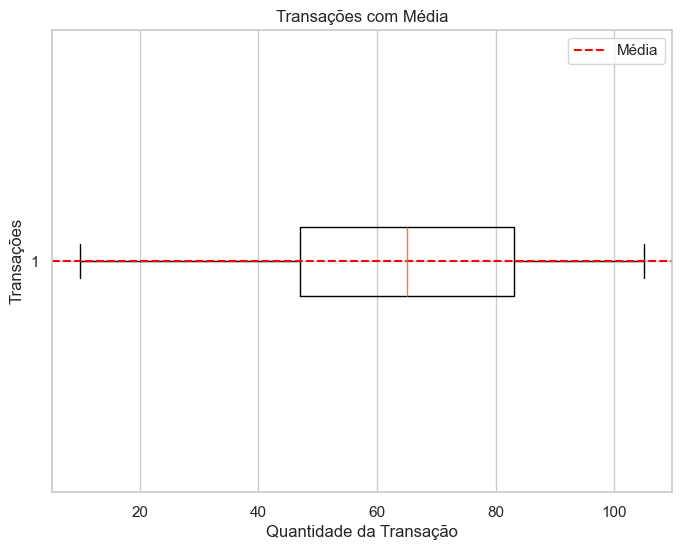

In [105]:
# Calcula a média das transações
media_transacoes = round(df['tran_amount'].mean(), 2)

# Exibir a média
print("\nMédia das transações:", media_transacoes)

# Cria o gráfico Média
plt.figure(figsize=(8, 6))
plt.boxplot(df['tran_amount'], vert=False)
plt.axhline(y=1, color='red', linestyle='--', label='Média')
plt.xlabel('Quantidade da Transação')
plt.ylabel('Transações')
plt.legend()
plt.title('Transações com Média')
plt.grid(True)
plt.show()

Desvio padrão das transações: 22.86


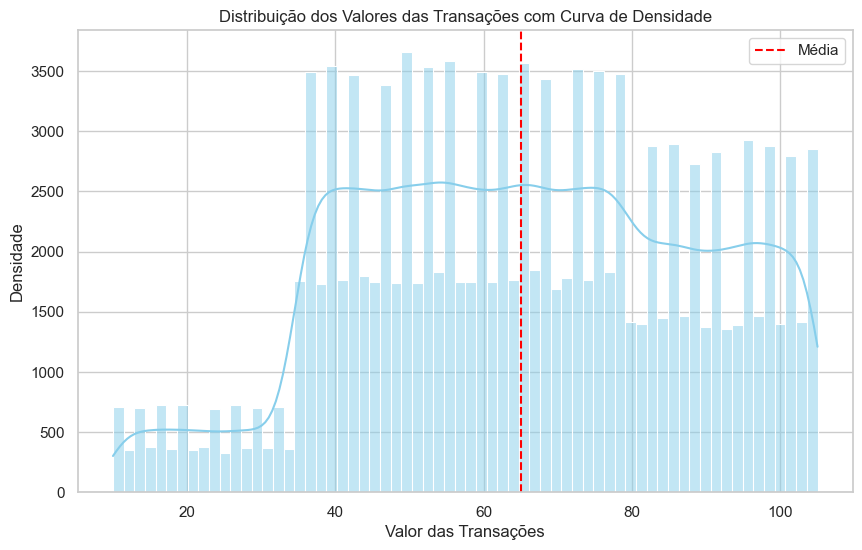

In [106]:
# Calcula o desvio padrão das transações
desvio_padrao_transacoes = round(df['tran_amount'].std(), 2)

# Exibir o desvio
print("Desvio padrão das transações:", desvio_padrao_transacoes)

# Configurar o estilo do gráfico
sns.set(style="whitegrid")

# Histograma com curva de densidade
plt.figure(figsize=(10, 6))
sns.histplot(df['tran_amount'], kde=True, color='skyblue')
plt.xlabel('Valor das Transações')
plt.ylabel('Densidade')
plt.title('Distribuição dos Valores das Transações com Curva de Densidade')
plt.axvline(df['tran_amount'].mean(), color='red', linestyle='--', label='Média')
plt.legend()
plt.show()

In [107]:
# Identifica os 10 clientes com a maior quantidade de transações
top_10_clientes = df['customer_id'].value_counts().nlargest(10)
print("\nTop 10 clientes com maior quantidade de transações:")
print(top_10_clientes)

# Calcula as médias transacionais dos top 10 clientes
medias_top_10_clientes = round(df.groupby('customer_id')['tran_amount'].mean().loc[top_10_clientes.index], 2)
print("\nMédias transacionais dos top 10 clientes:")
print(medias_top_10_clientes)


Top 10 clientes com maior quantidade de transações:
customer_id
CS4424    39
CS4320    38
CS3799    36
CS1215    35
CS5109    35
CS3805    35
CS2620    35
CS3013    35
CS4074    34
CS4998    34
Name: count, dtype: int64

Médias transacionais dos top 10 clientes:
customer_id
CS4424    75.21
CS4320    69.66
CS3799    69.81
CS1215    67.49
CS5109    71.60
CS3805    70.09
CS2620    67.43
CS3013    64.54
CS4074    72.41
CS4998    69.35
Name: tran_amount, dtype: float64


In [108]:
# Cria uma nova coluna no DataFrame com a data mais recente de transação de cada cliente
df['trans_date'] = pd.to_datetime(df['trans_date'])
df['data_recente'] = df.groupby('customer_id')['trans_date'].transform('max')

C:\Users\kabig\AppData\Local\Temp\ipykernel_19764\2065494344.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['trans_date'] = pd.to_datetime(df['trans_date'])


Quantidade média de transações por cliente: 18.14


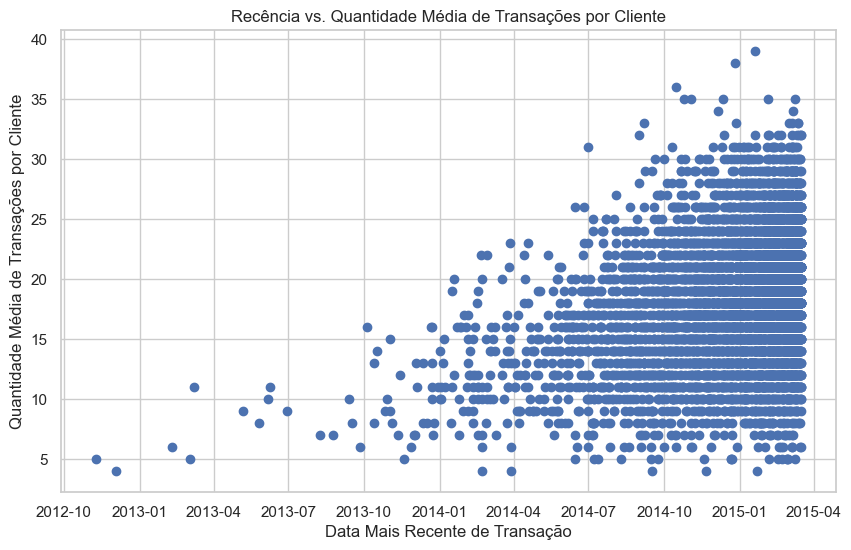

In [109]:
# Calcula a data mais recente de transação de cada cliente
df['trans_date'] = pd.to_datetime(df['trans_date'], format='%d-%b-%y')
recent_date_per_customer = df.groupby('customer_id')['trans_date'].max()

# Calcula a quantidade média de transações por cliente
media_transacoes_por_cliente = round(df.groupby('customer_id').size().mean(), 2)

# Exibir a quantidade média de transações de todos os clientes
print("Quantidade média de transações por cliente:", media_transacoes_por_cliente)

# Gráfico de dispersão
plt.figure(figsize=(10, 6))
plt.scatter(recent_date_per_customer, df.groupby('customer_id').size())
plt.xlabel('Data Mais Recente de Transação')
plt.ylabel('Quantidade Média de Transações por Cliente')
plt.title('Recência vs. Quantidade Média de Transações por Cliente')
plt.grid(True)
plt.show()

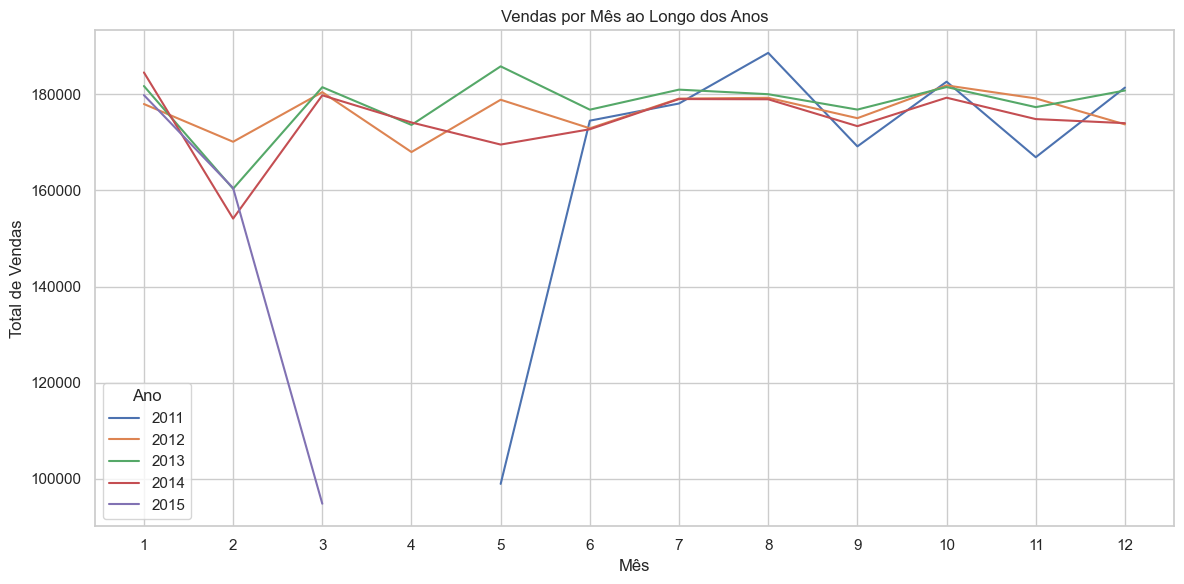

In [110]:
# Extrair o ano e mês de 'trans_date'
df['year'] = df['trans_date'].dt.year
df['month'] = df['trans_date'].dt.month

# Agrupa os dados por ano e mês e calcula a soma total das transações para cada grupo
vendas_por_mes = df.groupby(['year', 'month'])['tran_amount'].sum()

# Cria um gráfico de linha para visualizar as vendas por mês ao longo dos anos
plt.figure(figsize=(12, 6))
for year in vendas_por_mes.index.levels[0]:
    vendas_por_mes.loc[year].plot(label=year)
plt.title('Vendas por Mês ao Longo dos Anos')
plt.xlabel('Mês')
plt.ylabel('Total de Vendas')
plt.legend(title='Ano')
plt.xticks(range(1, 13))
plt.tight_layout()
plt.show()

In [111]:
# Calcula o total de tran_amount de cada ano
total_por_ano = df.groupby('year')['tran_amount'].sum()

# Exibir o total de tran_amount de cada ano
print("Total de transação de cada ano:")
print(total_por_ano)

# Calcula o total de todos os anos
total_total = total_por_ano.sum()

# Exibir o total de todos os anos
print("Total de todos os anos:", total_total)

Total de transação de cada ano:
year
2011    1340339
2012    2116599
2013    2137368
2014    2094508
2015     435175
Name: tran_amount, dtype: int64
Total de todos os anos: 8123989


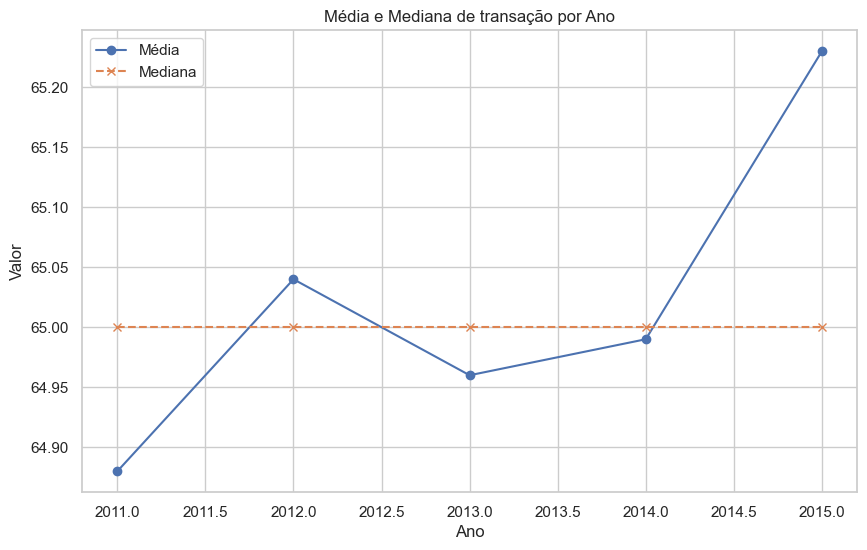

In [112]:
# Gráfico de linha com a média e a mediana de tran_amount para cada ano
plt.figure(figsize=(10, 6))
plt.plot(media_por_ano.index, media_por_ano.values, marker='o', label='Média')
plt.plot(mediana_por_ano.index, mediana_por_ano.values, marker='x', linestyle='--', label='Mediana')
plt.title('Média e Mediana de transação por Ano')
plt.xlabel('Ano')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.show()

In [113]:
# Calcula a média de tran_amount para cada ano
media_por_ano = round(df.groupby('year')['tran_amount'].mean(), 2)

# Calcula a mediana de tran_amount para cada ano
mediana_por_ano = df.groupby('year')['tran_amount'].median()

# Exibir a média e a mediana de cada ano
for year in media_por_ano.index:
    print(f"Ano: {year}")
    print(f"Média: {media_por_ano[year]}")
    print(f"Mediana: {mediana_por_ano[year]}")
    print()

Ano: 2011
Média: 64.88
Mediana: 65.0

Ano: 2012
Média: 65.04
Mediana: 65.0

Ano: 2013
Média: 64.96
Mediana: 65.0

Ano: 2014
Média: 64.99
Mediana: 65.0

Ano: 2015
Média: 65.23
Mediana: 65.0



Total de Vendas para o mês 1: 724107
Total de Vendas para o mês 2: 645154
Total de Vendas para o mês 3: 636577
Total de Vendas para o mês 4: 515791
Total de Vendas para o mês 5: 633212
Total de Vendas para o mês 6: 697014
Total de Vendas para o mês 7: 717223
Total de Vendas para o mês 8: 726921
Total de Vendas para o mês 9: 694433
Total de Vendas para o mês 10: 725320
Total de Vendas para o mês 11: 698273
Total de Vendas para o mês 12: 709964


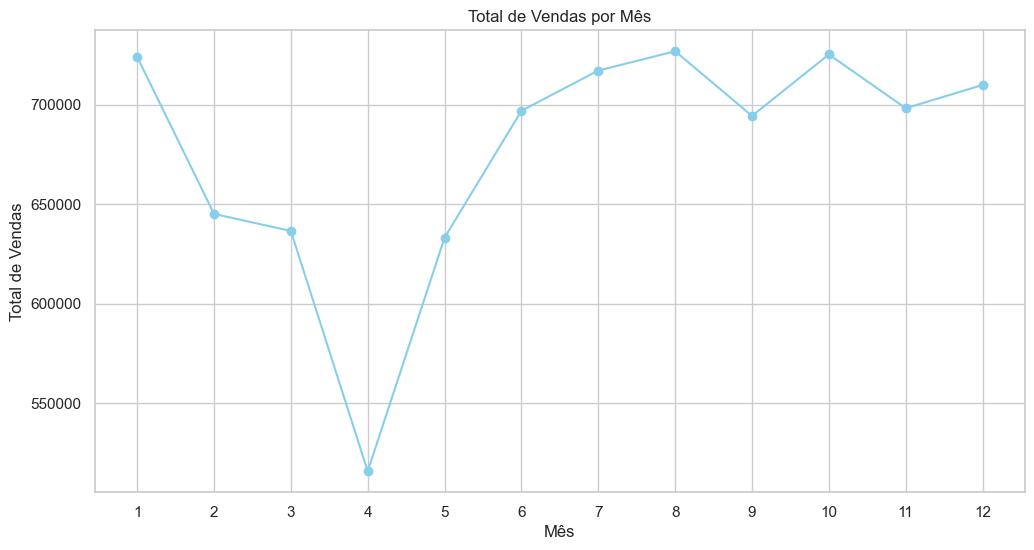

In [114]:
# Calcula o total de vendas por mês
total_vendas_por_mes = df.groupby('month')['tran_amount'].sum()

# Exibe o total de vendas por mês
for month, total_vendas in total_vendas_por_mes.items():
    print(f"Total de Vendas para o mês {month}: {total_vendas}")

# Gráfico de linhas com o total de vendas de cada mês
plt.figure(figsize=(12, 6))
plt.plot(total_vendas_por_mes.index, total_vendas_por_mes.values, marker='o', color='skyblue')
plt.title('Total de Vendas por Mês')
plt.xlabel('Mês')
plt.ylabel('Total de Vendas')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()

Transação que mais se repete entre todos os meses: 49


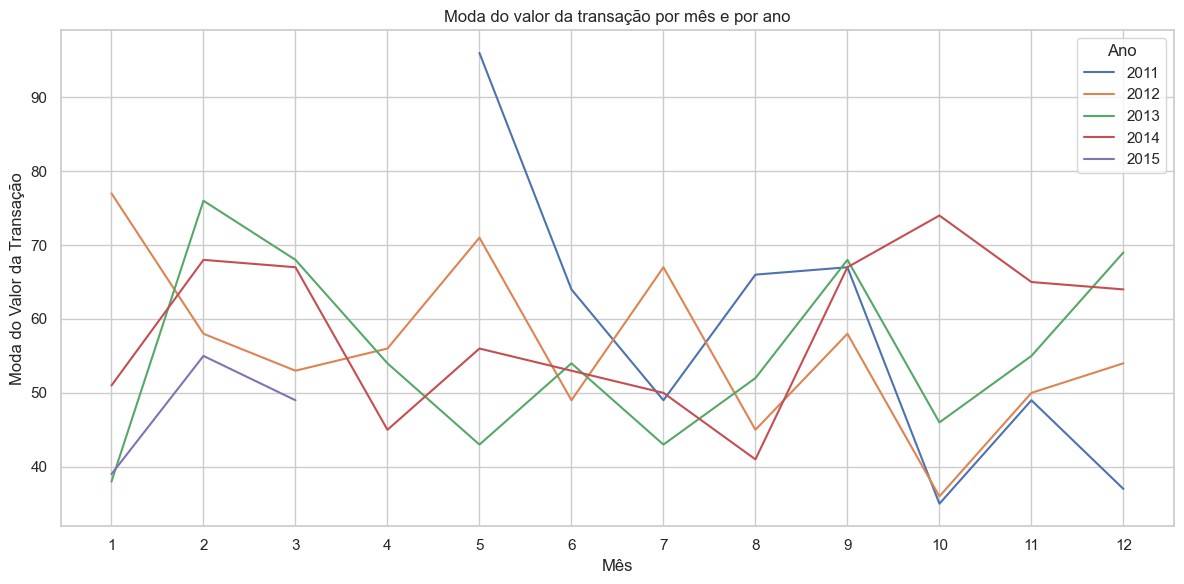

In [115]:
# Calcula a moda do valor da transação para todo o conjunto de dados
moda_total = df['tran_amount'].mode()[0]

print("Transação que mais se repete entre todos os meses:", moda_total)

# Calcula a moda do valor da transação para cada ano e mês
moda_por_ano_mes = df.groupby(['year', 'month'])['tran_amount'].apply(lambda x: x.mode().iloc[0])

# Cria um gráfico de linhas para comparar a moda de cada mês por ano
plt.figure(figsize=(12, 6))
for year in moda_por_ano_mes.index.levels[0]:
    moda_por_ano_mes.loc[year].plot(label=year)
plt.title('Moda do valor da transação por mês e por ano')
plt.xlabel('Mês')
plt.ylabel('Moda do Valor da Transação')
plt.legend(title='Ano')
plt.xticks(range(1, 13))
plt.tight_layout()
plt.show()



Média de Transação para o mês 1: 64.97
Média de Transação para o mês 2: 64.91
Média de Transação para o mês 3: 65.27
Média de Transação para o mês 4: 64.68
Média de Transação para o mês 5: 65.35
Média de Transação para o mês 6: 64.8
Média de Transação para o mês 7: 64.99
Média de Transação para o mês 8: 64.92
Média de Transação para o mês 9: 64.97
Média de Transação para o mês 10: 64.87
Média de Transação para o mês 11: 65.42
Média de Transação para o mês 12: 64.74


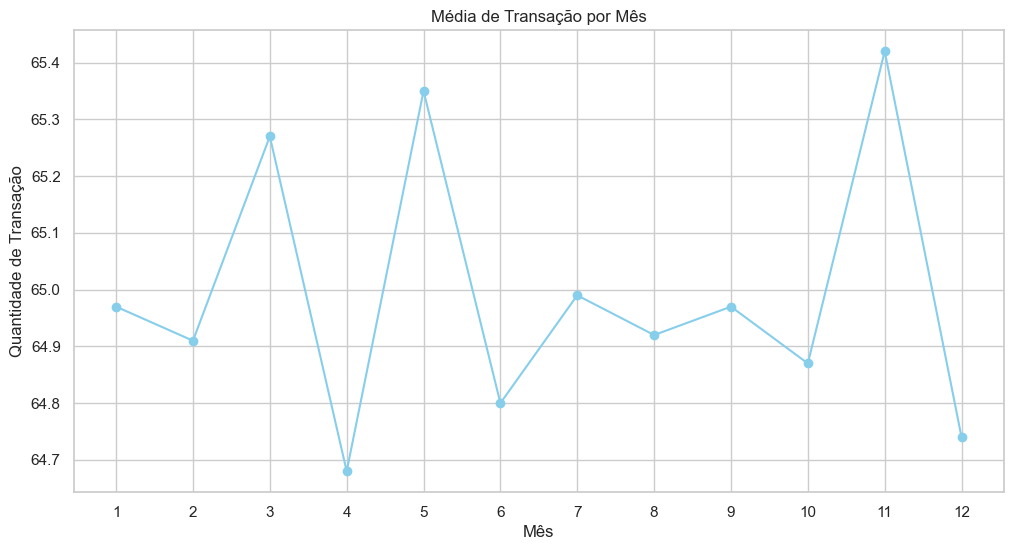

In [116]:
# Calcula a média do valor da transação para cada mês
media_por_mes = round(df.groupby('month')['tran_amount'].mean(), 2)

# Exibe a média do valor da transação para cada mês
for month, media in media_por_mes.items():
    print(f"Média de Transação para o mês {month}: {media}")

# Gráfico de linhas com a média de cada mês
plt.figure(figsize=(12, 6))
plt.plot(media_por_mes.index, media_por_mes.values, marker='o', color='skyblue')
plt.title('Média de Transação por Mês')
plt.xlabel('Mês')
plt.ylabel('Quantidade de Transação')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()

In [117]:
def mostrar_top_tres_meses(df, maior=True):
    # Calcular o total de transações por mês
    total_por_mes = df.groupby('month')['tran_amount'].sum()
    
    # Ordenar os totais de transações por mês
    ordenados = total_por_mes.sort_values(ascending=not maior)
    
    # Selecionar os três primeiros meses
    top_tres_meses = ordenados.head(3)

    if maior:
        descricao = "Os três meses que mais venderam foram:"
    else:
        descricao = "Os três meses que menos venderam foram:"
    
    print(descricao)
    for mes, total_transacoes in top_tres_meses.items():
        print("Mês:", mes, "- Total de transações:", total_transacoes)

# Chamar a função com o DataFrame como argumento
mostrar_top_tres_meses(df, maior=True)
print()
mostrar_top_tres_meses(df, maior=False)

Os três meses que mais venderam foram:
Mês: 8 - Total de transações: 726921
Mês: 10 - Total de transações: 725320
Mês: 1 - Total de transações: 724107

Os três meses que menos venderam foram:
Mês: 4 - Total de transações: 515791
Mês: 5 - Total de transações: 633212
Mês: 3 - Total de transações: 636577


In [118]:
# Calcula a soma total das transações para cada ano
total_por_ano = df.groupby('year')['tran_amount'].sum()

# Identifica o ano com o maior total de transações
ano_mais_vendido = total_por_ano.idxmax()
total_mais_vendido = total_por_ano.max()

# Identifica o ano com o menor total de transações
ano_menos_vendido = total_por_ano.idxmin()
total_menos_vendido = total_por_ano.min()

print("O ano que mais vendeu foi o ano", ano_mais_vendido, "com um total de", total_mais_vendido, "transações.")
print("O ano que menos vendeu foi o ano", ano_menos_vendido, "com um total de", total_menos_vendido, "transações.")

# Filtra o DataFrame para excluir os dados de 2015 e 2011
df_sem_2015_2011 = df[(df['year'] != 2015) & (df['year'] != 2011)]

# Calcula a soma total das transações para cada ano, considerando apenas os anos diferentes de 2015 e 2011
total_por_ano_sem_2015_2011 = df_sem_2015_2011.groupby('year')['tran_amount'].sum()

# Identifica o ano com o menor total de transações, desconsiderando 2015 e 2011
ano_menos_vendido_sem_2015_2011 = total_por_ano_sem_2015_2011.idxmin()
total_menos_vendido_sem_2015_2011 = total_por_ano_sem_2015_2011.min()

print("O ano que menos vendeu (desconsiderando 2015 e 2011) foi o ano", ano_menos_vendido_sem_2015_2011, "com um total de", total_menos_vendido_sem_2015_2011, "transações.")



O ano que mais vendeu foi o ano 2013 com um total de 2137368 transações.
O ano que menos vendeu foi o ano 2015 com um total de 435175 transações.
O ano que menos vendeu (desconsiderando 2015 e 2011) foi o ano 2014 com um total de 2094508 transações.


In [119]:
# Encontra o maior valor de transação
maior_valor_transacao = df['tran_amount'].max()

# Encontra o menor valor de transação
menor_valor_transacao = df['tran_amount'].min()

print("O maior valor de transação é:", maior_valor_transacao)
print("O menor valor de transação é:", menor_valor_transacao)

O maior valor de transação é: 105
O menor valor de transação é: 10
